<a href="https://colab.research.google.com/github/panghanwu/machine_learning_Elwing/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Reference](https://github.com/ageitgey/face_recognition)

In [1]:
!pip install face_recognition

Face vector length: 128


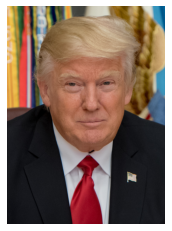

In [2]:
import face_recognition as fr
import matplotlib.pyplot as plt

img = fr.load_image_file('Trump.jpg')

en = fr.face_encodings(img)[0]
print('Face vector length:', len(en))

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
import glob

formats = ['jpg', 'png', 'jpeg']

fn = []

for f in formats:
  fn += glob.glob('*.{}'.format(f))
  fn += glob.glob('*.{}'.format(f.upper()))

print(fn)


['Tsai.jpg', 'Nana.jpg', 'Trump.jpg', 'cat.jpg', 'Han.jpg', 'Kim.jpg', 'Biden.jpg']


In [4]:
import os

encodings = []
names = []

for f in fn:
  try:
    img = fr.load_image_file(f)
    en = fr.face_encodings(img)[0]
    encodings.append(en)

    n = os.path.basename(f).split('.')[0]
    names.append(n)
  except IndexError:
    print(f, '-> No person face!')

print(names)

cat.jpg -> No person face!
['Tsai', 'Nana', 'Trump', 'Han', 'Kim', 'Biden']


Link:https://imgs.niusnews.com/upload/posts/po5_40849_1448956161.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


------------------------------
Tsai: 0.6667936493577152
Nana: 0.44352755035422764
Trump: 0.8399488113391227
Han: 0.647087805078585
Kim: 0.6221713849475234
Biden: 0.9398122572871106
The most similar: Nana
------------------------------
------------------------------
Tsai: 0.5978174945089417
Nana: 0.303906752688542
Trump: 0.8769496368566247
Han: 0.7111761883957156
Kim: 0.7062573774566508
Biden: 0.9283051212475462
The most similar: Nana
------------------------------


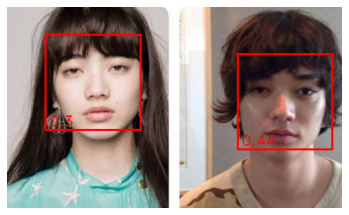

In [5]:
import requests
import cv2

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0'
}
url = input('Link:')

response = requests.get(url, headers=headers, stream=True, verify=False)
img = fr.load_image_file(response.raw)

locs = fr.face_locations(img, model='cnn')
ens = fr.face_encodings(img, known_face_locations=locs)

for en, loc in zip(ens, locs):
  (top, right, bottom, left) = loc
  cv2.rectangle(img, (left, top), (right, bottom), (255,0,0), 2)
  distances = fr.face_distance(en, encodings)

  print('-'*30)
  for na, dis in zip(names, distances):
    print(str(na)+':', dis)
  print('The most similar:', names[distances.argmin()])
  print('-'*30)

  font = cv2.FONT_HERSHEY_DUPLEX
  d = str(round(min(distances), 2))
  cv2.putText(img, d, (left + 6, bottom - 6), font, 0.7, (255, 0, 0), 1)


plt.imshow(img)
plt.axis('off')
plt.show()